<a href="https://colab.research.google.com/github/SriSatyaLokesh/some-app-for-whatsapp/blob/master/notebooks/analytics/WhatsAppAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import re

mediaPattern = r"(\<Media omitted\>)" # Because it serves no purpose
regexMedia = re.compile(mediaPattern, flags=re.M)

dateAndTimepattern = r"(\d+\/\d+\/\d+)(,)(\s)(\d+:\d+)(\s)(\w+)(\s)(-)(\s\w+)*(:)"
regexDate = re.compile(dateAndTimepattern, flags=re.M)

In [0]:
def cleanText(filename):    
    # encoding will allow for easier pasrsing of files
    chat = open(filename, encoding="utf8")
    chatText = chat.read()
    chat.close()

    # 01/09/17, 11:34 PM - Amfa:

    """
    Removes the matches and 
    replace them with an empty string
    """
    chatText = regexMedia.sub("", chatText)
    chatText = regexDate.sub("", chatText)

    lines = []

    for line in chatText.splitlines():
        if line.strip() is not "": # If it's empty, we don't need it
            lines.append(line.strip())

    return lines

In [0]:
import nltk
nltk.download('vader_lexicon')

In [0]:
import sys
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

Negative: 0.5221932114882507% | Neutral: 90.07832898172323% | Positive: 9.399477806788513%


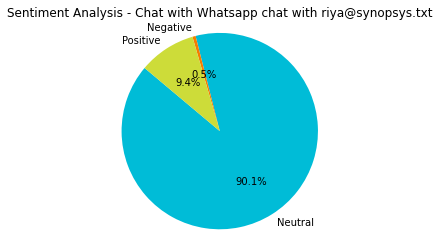

In [9]:
def analyze(name):
    linesList = cleanText(name)
    neutral, negative, positive = 0, 0, 0

    for index, sentence in enumerate(linesList):
        if re.match(r'^[\w]', sentence) is None:
            continue
        scores = sentiment_analyzer.polarity_scores(sentence)
        scores.pop('compound', None)

        maxAttribute = max(scores, key=lambda k: scores[k])

        if maxAttribute == "neu":
            neutral += 1
        elif maxAttribute == "neg":
            negative += 1
        else:
            positive += 1

    total = neutral + negative + positive
    print("Negative: {0}% | Neutral: {1}% | Positive: {2}%".format(
        negative*100/total, neutral*100/total, positive*100/total))

    labels = 'Neutral', 'Negative', 'Positive'
    sizes = [neutral, negative, positive]
    colors = ['#00bcd7', '#F57C00', '#CDDC39']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)

    plt.axis('equal')
    plt.title("Sentiment Analysis - Chat with {0}".format(name.capitalize()))
    plt.show()
analyze("WhatsApp Chat with Riya@Synopsys.txt")